### Comprehensive Report on Sleep Health and Lifestyle

In [1756]:
# import the packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [1757]:
# import the dataset
sleep = pd.read_csv('/Users/jencyfrancis/Downloads/Sleep_health_and_lifestyle_dataset.csv')
sleep.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress_Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [1758]:
sleep.dtypes

Person ID                    int64
Gender                      object
Age                          int64
Occupation                  object
Sleep Duration             float64
Quality of Sleep             int64
Physical Activity Level      int64
Stress_Level                 int64
BMI Category                object
Blood Pressure              object
Heart Rate                   int64
Daily Steps                  int64
Sleep Disorder              object
dtype: object

In [1759]:
# basic statistics
sleep.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress_Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


### Graph 1 : Scatter Plot

In [1761]:
# selecting the variables
x = sleep["Age"]
y = sleep["BMI Category"]

In [1762]:
def plot_random_scatter(x,y):
    """
    Creates a scatter plot of random x and y data
    """
    plt.figure(dpi = 144)

    # scatter plot
    sns.scatterplot(data = sleep, x = "Age", y = "BMI Category", hue = "Gender", marker = 's')

    # add a grid to the plot
    plt.grid(color = 'lightgray', linestyle = '-', zorder = 0)

    # formatting
    plt.xlabel("Age", fontsize = 10)
    plt.ylabel("BMI Category", fontsize = 10)
    plt.xticks(fontsize = 7)
    plt.yticks(fontsize = 7)
    plt.title('Relationship between BMI Category and Age by Gender', fontsize = 13)
    plt.savefig("Scatter.png", bbox_inches = "tight", dpi = 400)
    return

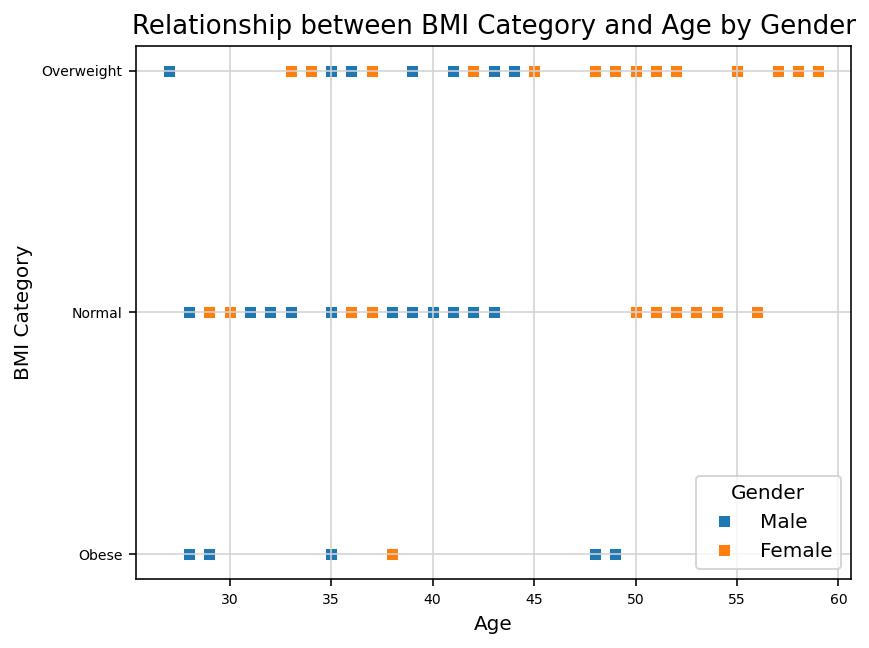

In [1763]:
plot_random_scatter(x,y)

### Graph 2 : Pie Chart

In [1765]:
# data is aggregrated on Stress_Level
sleep_stress = sleep.groupby('Stress_Level').Stress_Level.value_counts()
labels = sleep_stress.index.to_list()

In [1766]:
def plot_stress_pie(sleep_stress, labels = stress_level):
    """
    Plot of sum of stress level
    """
    # pie chart
    plt.pie(sleep_stress, autopct = '%1.1f%%', colors=['crimson', 'cornflowerblue', 'pink', 'teal', 'gray', 'orange'] ,textprops = {'fontsize':14})
    plt.legend(labels = labels, bbox_to_anchor = (1.13, 0.96), loc = 'upper right')
    plt.title("Stress Level Distribution", fontsize = 17)
    plt.savefig('piechart.jpg', dpi = 400)
    return

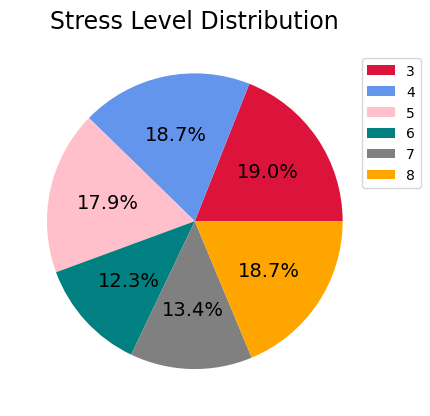

In [1767]:
plot_stress_pie(sleep_stress.to_list(),labels)

In [1768]:
# Skewness for Stress Level Distribution
sleep_skew_kurt_check = sleep[['Stress_Level']].copy()
sleep_skew_kurt_check.skew()

Stress_Level    0.15433
dtype: float64

In [1769]:
# Kurtosis for Stress Level Distribution
sleep_skew_kurt_check.kurtosis()

Stress_Level   -1.327307
dtype: float64

### Graph 3 : Heatmap

In [1771]:
# dropping irrelevant columns
sleep = sleep.drop(columns=['Person ID','Age','Gender','Occupation','BMI Category','Blood Pressure','Heart Rate','Sleep Disorder'])
sleep

,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress_Level,Daily Steps
0,6.1,6,42,6,4200
1,6.2,6,60,8,10000
2,6.2,6,60,8,10000
3,5.9,4,30,8,3000
4,5.9,4,30,8,3000
...,...,...,...,...,...
369,8.1,9,75,3,7000
370,8.0,9,75,3,7000
371,8.1,9,75,3,7000
372,8.1,9,75,3,7000


In [1772]:
def plot_heatmap(sleep):
    """
    Plots correlation between Sleep and Stress Level
    """

    # heatmap
    plt.figure(dpi = 144)
    sns.heatmap(sleep.corr(), annot = True, vmin = -1, vmax = 1, cmap = 'Blues')
    plt.title('Correlation between Sleep and Lifestyle')
    plt.savefig("Heatmap.png", bbox_inches = "tight", dpi = 400)
    plt.show()
    return

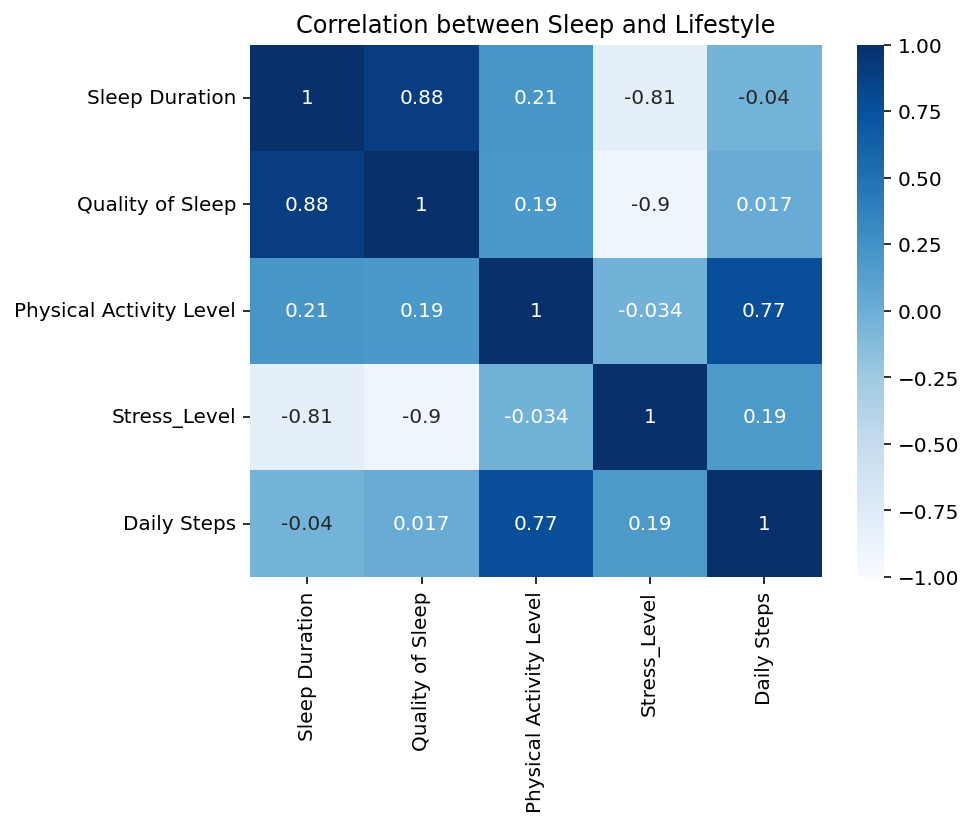

In [1773]:
plot_heatmap(sleep)